# Fonctions arithmétiques

La division euclidienne s'obtient avec les commandes `//` (donne le quotient) et `%` (donne le reste).

In [1]:
9//4

2

In [2]:
9%4

1

Ces commandes marchent aussi avec des polynômes !

In [3]:
R.<X> = PolynomialRing(QQ)
P = X^3+3*X+1
Q = X+4
P//Q

X^2 - 4*X + 19

In [4]:
P%Q

-75

In [5]:
(X^2-4*X+19)*(X+4) - 75

X^3 + 3*X + 1

Les ensembles usuels sont obtenus avec les commandes `NN` (entiers naturels), `ZZ` (entiers relatifs), `QQ` (nombres rationels), `RR` (nombres réels), `CC` (nombres complexes). En particulier, la commande suivante force le nombre $3$ à être considéré comme un réel :

In [6]:
RR(3)

3.00000000000000

L'anneau des entiers modulo n est obtenu par la commande `Zmod(n)`.

In [7]:
Z13 = Zmod(13)
Z13(17)

4

Si on veut faire une exponentiation dans l'anneau $\mathbb{Z}/n\mathbb{Z}$, on peut utiliser la fonction `power_mod`.

In [8]:
power_mod(4,4,13)

9

In [9]:
4^4 % 13

9

Le pgcd de deux entiers est obtenu avec la commande `gcd`. Cela marche aussi avec des polynômes (c'est vrai pour de nombreuses commandes dans ce qui suit).

In [10]:
gcd(84,120)

12

La commande `xgcd(a,b)` renvoie le pgcd de $a$ et $b$, ainsi que deux nombres $u$ et $v$ tels que $au+bv=\mathrm{pgcd}(a,b)$.

In [11]:
xgcd(84,120)

(12, 3, -2)

In [12]:
3*84-2*120

12

Pour résoudre un système chinois, on utilise la commande `crt(L1,L2)`, où `L1` et `L2` sont deux listes de même taille donnant les équations de congruence. Par exemple, `crt([3,2],[7,11])` résoud le système d'équations $x \equiv 3 \bmod 7$ et $ x \equiv 2 \bmod 11$.

In [13]:
crt([3,2],[7,11])

24

Pour savoir si un nombre $k$ est un carré dans $\mathbb{Z}/p\mathbb{Z}$, on utilise le symbole de Legendre $\left(\frac{k}{p}\right)$, égal à $0$ si $p$ divise $k$, à $1$ si $k$ est un carré non nul modulo $p$, et à $-1$ sinon. La commande Sage est `legendre_symbol(k,p)`.

In [14]:
legendre_symbol(10,13)

1

In [15]:
(6^2)%13

10

La fonction `is_prime(a)` teste si un nombre $a$ est premier. La fonction `next_prime(a)` renvoie le plus petit nombre premier suivant $a$, la fonction `random_prime(a)` renvoie un nombre premier aléatoire plus petit que $a$. Finalement, `prime_range(a,b)` donne la liste de tous les nombres premiers entre $a$ et $b$.

In [16]:
is_prime(113)

True

In [17]:
next_prime(2^16)

65537

In [18]:
random_prime(2^16)

32587

In [19]:
prime_range(50,100)

[53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

Pour décomposer un nombre en facteurs premiers, on utilise `factor` (marche aussi pour trouver les facteurs irréductibles d'un polynôme).

In [20]:
factor(2^32+1)

641 * 6700417

In [21]:
R.<X> = PolynomialRing(QQ)
P = X^3-3*X+2
factor(P)

(X + 2) * (X - 1)^2

# Anneaux de polynômes, quotients, corps finis

Pour définir un anneau de polynômes $k[X]$, on doit indiquer à Sage le corps `k` et le nom de la variable `X`. Ceci est fait simultanément avec la commande suivante : `Rk.<X>=PolynomialRing(k)`. Ceci crée une variable appelée `X`, ainsi que l'objet `Rk` qui est l'anneau des polynômes en une variable sur le corps $k$. On peut bien sûr utiliser une autre nom pour la variable, choisir le corps de base $k$ que l'on souhaite (ou même utiliser un anneau $A$ et travailler avec un anneau de polynômes $A[X]$) ; il est également possible de travailler avec des polynômes en plusieurs variables.

In [22]:
RQ.<X> = PolynomialRing(QQ)
RQ

Univariate Polynomial Ring in X over Rational Field

In [23]:
X^2+3*X-2/3

X^2 + 3*X - 2/3

In [24]:
_.parent()

Univariate Polynomial Ring in X over Rational Field

In [25]:
RQ2.<X,Y> = PolynomialRing(QQ,2)

In [26]:
RQ2

Multivariate Polynomial Ring in X, Y over Rational Field

In [27]:
X*Y+3*Y^3

3*Y^3 + X*Y

In [28]:
_.parent()

Multivariate Polynomial Ring in X, Y over Rational Field

On travaillera quasiment exclusivement avec des polynômes en une variable. Dans ce cas, une convention utile est d'appeler `Rk` l'anneau des polynômes à coefficients dans `k`. Pour savoir si un polynôme $P$ est irréductible dans $k[X]$, on utilise la méthode `is_irreducible`. Attention, la réponse dépend du corps $k$.

In [29]:
RR.<X> = PolynomialRing(RR)
P = X^2+1
P.is_irreducible()

True

In [30]:
RC.<X> = PolynomialRing(CC)
P = X^2+1
P.is_irreducible()

False

In [31]:
factor(P)

(X - I) * (X + I)

Étant donné un anneau de polynômes $k[X]$ et un polynôme $P(X)$, il est possible de définir dans Sage l'anneau quotient $k[X]/(P)$, en utilisant la méthode `quotient` des anneaux de polynômes. La manipulation de ces anneaux est similaire à celle des anneaux $\mathbb{Z}/n\mathbb{Z}$.

In [32]:
RQ.<X> = PolynomialRing(QQ)
P(X)=X^2+3*X-2
RQquotP = RQ.quotient(P)

In [33]:
RQquotP

Univariate Quotient Polynomial Ring in Xbar over Rational Field with modulus X^2 + 3*X - 2

In [34]:
RQquotP(X^3-1)

11*Xbar - 7

Par convention, si `X` est le nom de la variable dans $k[X]$, alors Sage appelle `Xbar` l'image de cette variable dans le quotient $k[X]/(P)$.

In [35]:
RQ(X^3-1) % RQ(X^2+3*X-2)

11*X - 7

Ici, le polynôme $P$ est irréductible dans $\mathbb{Q}[X]$, donc l'anneau quotient est un corps.

In [36]:
RQquotP.is_field()

True

Le corps fini $\mathbb{F}_q$ avec $q=p^n$ peut être construit en prenant le quotient de $\mathbb{F}_p[X]$ par l'idéal engendré par un polynôme irréductible $P$ de degré $n$. La commande `GF(q)` définit ce corps dans Sage ; si l'on veut préciser le nom `u` de l'image de $X$ par le morphisme canonique $\mathbb{F}_p[X] \to \mathbb{F}_p[X]/(P) =\mathbb{F}_q$, on écrira : `Fq.<u> = GF(q)`. Ceci crée le corps fini (nommé `Fq`) par Sage, et indique le nom `u` du générateur de $\mathbb{F}_q$ sur $\mathbb{F}_p$.

In [37]:
F16.<u> = GF(16)
F16

Finite Field in u of size 2^4

Pour savoir quel polynôme irréductible Sage a choisi, on utilise la méthode `polynomial` :

In [38]:
F16.polynomial()

u^4 + u + 1

Si au moment de la création du corps fini on veut préciser quel polynôme irréductible utiliser, on peut le faire avec l'option `modulus` (le polynôme indiqué doit alors utiliser la variable `x`).

In [39]:
F16_2.<v> = GF(16, modulus=x^4+x^3+1)
F16_2, F16_2.polynomial()

(Finite Field in v of size 2^4, v^4 + v^3 + 1)

Le morphisme de Frobenius de $\mathbb{F}_q$ avec $q=p^{n \geq 1}$ est l'application $x \mapsto x^p$ ; c'est un automorphisme de corps. On l'obtient dans Sage à partir de $\mathbb{F}_q$ avec la méthode `frobenius_endomorphism`.

In [40]:
F = F16.frobenius_endomorphism()
F

Frobenius endomorphism u |--> u^2 on Finite Field in u of size 2^4

In [42]:
F(u^3+u+1)

u^3 + 1

In [43]:
F(u^3+u+1),F(F(u^3+u+1)),F(F(F(u^3+u+1))),F(F(F(F(u^3+u+1))))

(u^3 + 1, u^3 + u^2 + 1, u^3 + u^2 + u, u^3 + u + 1)

Étant donné un polynôme $P$ à coefficients dans $\mathbb{F}_p$, le morphisme de Frobenius permute les racines de $P$ dans le corps $\mathbb{F}_q$. Considérons par exemple le polynôme $P(X)=X^4+X^3+1$ dans $\mathbb{F}_2[X]$. Ce polynôme est irréductible dans $\mathbb{F}_2$.

In [45]:
RF2.<X> = PolynomialRing(GF(2))
P = RF2(X^4+X^3+1)
P

X^4 + X^3 + 1

In [46]:
P.is_irreducible()

True

Par contre, $P$ n'est pas irréductible dans $\mathbb{F}_{16}$ ; il y est même scindé à racines simples, le morphisme de Frobenius permutant cycliquement les racines.

In [47]:
RF16.<Y> = PolynomialRing(F16)
PP = RF16(P)
PP

Y^4 + Y^3 + 1

In [48]:
factor(PP)

(Y + u^3 + 1) * (Y + u^3 + u + 1) * (Y + u^3 + u^2 + 1) * (Y + u^3 + u^2 + u)

# Résultant de deux polynômes

Le résultant de deux polynômes en une variable permet de savoir s'ils ont un facteur irréductible en commun (il s'annule si et seulement si c'est le cas). La commande Sage est `P.resultant(Q)`.

In [56]:
RQ.<X> = PolynomialRing(QQ)
P = X^4 + 3*X^3 - 5*X - 3
Q = X^5 + X^4 + 2*X^2 - 10*X + 3
P.resultant(Q)

0

In [57]:
gcd(P,Q)

X^2 + X - 3

Une application intéressante de la théorie des résultants est la détermination des intersections de deux courbes algébriques. Considérons les deux courbes algébriques réelles $\mathcal{C}_P$ et $\mathcal{C}_Q$ déterminées par les équations
$$ P(x,y) = y^4-y^3+y^2-2x^2y+x^4 = 0$$
et 
$$ Q(x,y) = y-2x^2=0.$$
On peut dessiner ces courbes algébriques avec Sage.

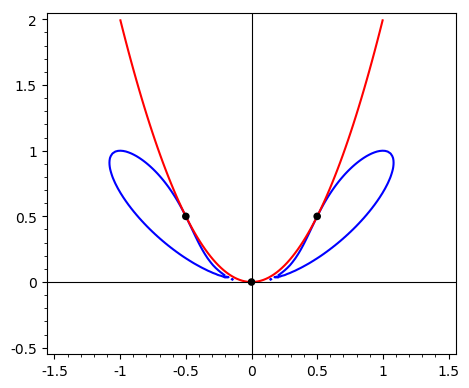

In [76]:
RQ2.<x,y> = PolynomialRing(QQ,2)
G = Graphics()
P = RQ2(y^4 - y^3 + y^2 - 2*(x^2)*y + x^4)
Q = RQ2(y - 2*x^2)
G += implicit_plot(P, (x,-1.5,1.5), (y,-0.5,2))
G += implicit_plot(Q, (x,-1.5,1.5), (y,-0.5,2), color="red")
G += points([(0,0),(0.5,0.5),(-0.5,0.5)], size=30, color="black", zorder=10)
G.show(axes=True)

Il semble qu'il y ait trois points d'intersection ; expliquons comment démontrer cela et comment trouver les intersections. Si $y_0$ est l'ordonnée d'un point d'intersection $(x_0,y_0)$ de $\mathcal{C}_P$ et $\mathcal{C}_Q$, alors les deux polynômes en une variable $P_{y_0} = P(\cdot,y_0)$ et $Q_{y_0} = Q(\cdot,y_0)$ ont pour racine commune $y_0$, donc 
$$\mathrm{Res}(P_{y_0},Q_{y_0})=0.$$
L'équation ci-dessus est polynomiale en $y_0$, et permet de trouver les ordonnées possibles $y_0$. Pour notre exemple, on procède comme suit :

In [78]:
R = P.resultant(Q,x)
R, factor(R)

(16*y^8 - 32*y^7 + 24*y^6 - 8*y^5 + y^4, y^4 * (2*y - 1)^4)

La commande `P.resultant(Q,x)` calcule le résultant par rapport à la variable $x$ des deux polynômes ; on obtient un polynôme en $y$ dont les racines sont les ordonnées $y_0$ possibles pour un point d'intersection (on pourrait aussi d'abord chercher les $x_0$ possibles avec la commande `P.resultant(Q,y)`). Ici, les $y_0$ possibles sont $y_0=0$ et $y_0=\frac{1}{2}$.

In [83]:
RQX.<x> = PolynomialRing(QQ)
RQY.<y> = PolynomialRing(QQ)
RQY(R).roots()

[(1/2, 4), (0, 4)]

Les multiplicités $4$ que l'on obtient ont un sens géométrique : le point d'intersection de $\mathcal{C}_P$ et $\mathcal{C}_Q$ d'ordonnée $0$ est un point où les courbes sont tangentes et coincident jusqu'à l'ordre $4$, tandis que les deux points d'intersection d'ordonnée $\frac{1}{2}$ sont des points de tangence des deux courbes.

Pour trouver les $x_0$ correspondants aux $y_0$ précédemment calculées, on peut utiliser la méthode `.subs(y=a)` pour obtenir des polynômes en une seule variable $x$ (élimination de la variable $y$), et chercher leurs racines.

In [84]:
Q0 = RQX(Q.subs(y=0))
Q0, Q0.roots()

(-2*x^2, [(0, 2)])

Pour $y_0=0$, on obtient $x_0=0$.

In [85]:
Qhalf = RQX(Q.subs(y=1/2))
Qhalf, Qhalf.roots()

(-2*x^2 + 1/2, [(1/2, 1), (-1/2, 1)])

Pour $y_0 = \frac{1}{2}$, on obtient $x_0 = \pm \frac{1}{2}$. Conclusion : les trois points d'intersection sont $(0,0)$, $(\frac{1}{2},\frac{1}{2})$ et $(-\frac{1}{2},\frac{1}{2})$.